In [1]:
#如果隐藏层没有sigmoid函数，会有什么影响？

import numpy as np
import matplotlib.pyplot as plt

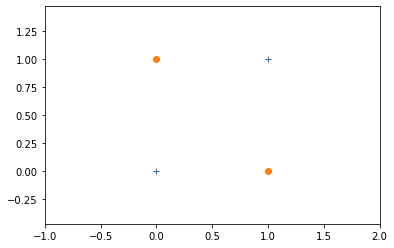

In [2]:
plt.plot([0,1],[0,1],'+')
plt.plot([1,0],[0,1],'o')
plt.axis("equal")
plt.axis([-1,2,-1,2])
plt.show()

In [3]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
sampleNo = 2
s = np.array([[0,0,1],[1,1,1],[1,0,0],[0,1,0]])
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

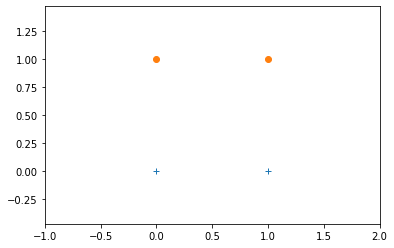

In [4]:
plt.plot([0,1],[0,0],'+')
plt.plot([1,0],[1,1],'o')
plt.axis("equal")
plt.axis([-1,2,-1,2])
plt.show()

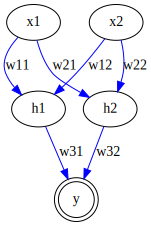

In [6]:
from graphviz import Digraph
u = Digraph()
u.edge("x1", "h1", label="w11", color="blue")
u.edge("x1", "h2", label="w21", color="blue")
u.edge("x2", "h1", label="w12", color="blue")
u.edge("x2", "h2", label="w22", color="blue")
u.edge("h1", "y", label="w31", color="blue")
u.edge("h2", "y", label="w32", color="blue")
u.node("y", shape="doublecircle")
u

In [12]:
def twolayerNN(s, sampleNo):
    # 随机初始化各个参数
    w11 = np.random.rand()
    w12 = np.random.rand()
    w21 = np.random.rand()
    w22 = np.random.rand()
    w31 = np.random.rand()
    w32 = np.random.rand()
    b1 = np.random.rand()
    b2 = np.random.rand()
    b3 = np.random.rand()
    loss = 100000
    epoch = 0
    MaxEpoch = 1000
    lr = 1

    while True:
        if(epoch%20==0):
            print("epoch:", epoch)
            print("w11:%.2f, w12:%.2f, b1:%.2f"%(w11,w12,b1))
            print("w21:%.2f, w22:%.2f, b2:%.2f"%(w21,w22,b2))
            print("w31:%.2f, w32:%.2f, b3:%.2f"%(w31,w32,b3))
        lastloss = loss
        loss = 0
        partialw11 = 0
        partialw12 = 0
        partialb1 = 0
        partialw21 = 0
        partialw22 = 0
        partialb2 = 0
        partialw31 = 0
        partialw32 = 0
        partialb3 = 0
        for k in range(sampleNo):
            h1 = (w11*s[k,0]+w12*s[k,1]+b1)
            h2 = (w21*s[k,0]+w22*s[k,1]+b2)
            yhat = sigmoid(w31*h1+w32*h2+b3)
            #print("%.1f,\t%.1f,\t%.1f,\t%.1f,\t%.1f,\t%.1f"%(s[k,0], s[k,1], s[k,2], h1, h2, yhat))
            y = s[k,2]
            loss += (yhat-y)*(yhat-y)

            partialw31 += 2*(yhat-y)*yhat*(1-yhat)*h1
            partialw32 += 2*(yhat-y)*yhat*(1-yhat)*h2
            partialb3 += 2*(yhat-y)*yhat*(1-yhat)

            partialh1 = 2*(yhat-y)*yhat*(1-yhat)*w31
            partialh2 = 2*(yhat-y)*yhat*(1-yhat)*w32

            partialw11 += partialh1*h1*(1-h1)*s[k,0]
            partialw12 += partialh1*h1*(1-h1)*s[k,1]
            partialb1 += partialh1*h1*(1-h1)

            partialw21 += partialh2*h2*(1-h2)*s[k,0]
            partialw22 += partialh2*h2*(1-h2)*s[k,1]
            partialb2 += partialh2*h2*(1-h2)

        if(epoch%20==0):
            print("loss:%.2f"%loss)
        #if(lastloss<loss):
        #    break
        w11 = w11 - lr * partialw11
        w12 = w12 - lr * partialw12
        b1 = b1 - lr * partialb1
        w21 = w21 - lr * partialw21
        w22 = w22 - lr * partialw22
        b2 = b2 - lr * partialb2
        w31 = w31 - lr * partialw31
        w32 = w32 - lr * partialw32
        b3 = b3 - lr * partialb3
        epoch = epoch+1
        if(epoch>MaxEpoch):
            break
        if(loss<0.01):
            break
    print("epoch:", epoch)
    print("w11:%.2f, w12:%.2f, b1:%.2f"%(w11,w12,b1))
    print("w21:%.2f, w22:%.2f, b2:%.2f"%(w21,w22,b2))
    print("w31:%.2f, w32:%.2f, b3:%.2f"%(w31,w32,b3))
    print("loss:%.2f"%loss)
twolayerNN(s, 4)

epoch: 0
w11:0.06, w12:0.73, b1:0.39
w21:0.29, w22:0.72, b2:0.35
w31:0.83, w32:0.33, b3:0.70
loss:1.45
epoch: 20
w11:-0.40, w12:1.11, b1:0.75
w21:4.78, w22:4.52, b2:4.63
w31:-0.08, w32:-1.80, b3:-0.19
loss:2.00
epoch: 40
w11:-0.40, w12:1.11, b1:0.75
w21:4.78, w22:4.52, b2:4.84
w31:-0.07, w32:-1.76, b3:-0.18
loss:2.00
epoch: 60
w11:-0.40, w12:1.11, b1:0.75
w21:4.78, w22:4.52, b2:5.04
w31:-0.07, w32:-1.73, b3:-0.18
loss:2.00
epoch: 80
w11:-0.40, w12:1.11, b1:0.75
w21:4.78, w22:4.52, b2:5.21
w31:-0.07, w32:-1.71, b3:-0.17
loss:2.00
epoch: 100
w11:-0.40, w12:1.11, b1:0.75
w21:4.78, w22:4.52, b2:5.36
w31:-0.06, w32:-1.69, b3:-0.17
loss:2.00
epoch: 120
w11:-0.40, w12:1.11, b1:0.75
w21:4.78, w22:4.52, b2:5.50
w31:-0.06, w32:-1.67, b3:-0.17
loss:2.00
epoch: 140
w11:-0.40, w12:1.11, b1:0.75
w21:4.78, w22:4.52, b2:5.64
w31:-0.06, w32:-1.65, b3:-0.16
loss:2.00
epoch: 160
w11:-0.40, w12:1.11, b1:0.75
w21:4.78, w22:4.52, b2:5.76
w31:-0.06, w32:-1.64, b3:-0.16
loss:2.00
epoch: 180
w11:-0.40, w12:1.1

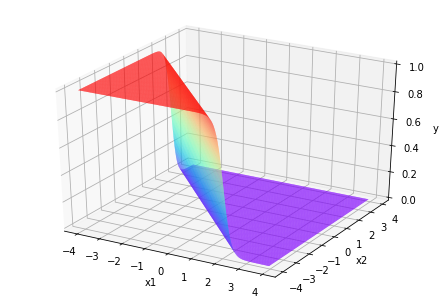

In [13]:
# 画出双层神经网络的预测图
# 画3D图看一下不同点网络的输出是什么样的
fig = figure()
ax = Axes3D(fig)
x1 = np.arange(-4, 4, 0.05)
x2 = np.arange(-4, 4, 0.05)
X, Y = np.meshgrid(x1, x2)
Z = np.zeros(X.shape)
width, height = X.shape
w11 = -0.40
w12 = 1.11
b1 = 0.75
w21 = 4.78
w22 = 4.52 
b2 = 8.31
w31 = -0.02
w32 = -1.35
b3 = -0.12
for i in range(height):
    for j in range(width):
        x1 = X[i,j]
        x2 = Y[i,j]
        h1 = (w11*x1+w12*x2+b1)
        h2 = (w21*x1+w22*x2+b2)
        Z[i,j] = sigmoid(w31*h1+w32*h2+b3)

ax.plot_surface(X, Y, Z, cmap='rainbow', rstride=1, cstride=1, alpha=0.9, lw=1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
#ax.set_zlim(0,40)
plt.show()

In [14]:
sampleNo = 40;
mu = 0
sigma = 3
x = np.random.normal(mu, sigma, sampleNo)
mu = 0
sigma = 3
y = np.random.normal(mu, sigma, sampleNo)
# group
s = np.vstack((x,y)).T
if s.shape[1] == 2:
    s = np.insert(s, 2, values=0, axis=1) # 增加一列标记值
s0 = np.array([])
s1 = np.array([])
for i in range(sampleNo):
    if(abs(s[i,0])+abs(s[i,1])<=5):
        s0 = np.append(s0, np.array([s[i,0],s[i,1]]), axis = 0)
    else:
        s1 = np.append(s1, np.array([s[i,0],s[i,1]]), axis = 0)
        s[i,2] = 1
     
s0 = s0.reshape(int(s0.size/2), 2)
s1 = s1.reshape(int(s1.size/2), 2)

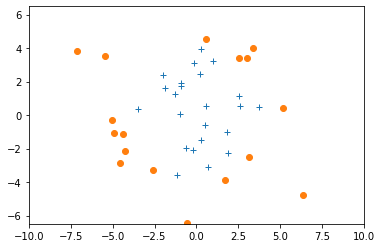

In [15]:
plt.plot(s0[:,0],s0[:,1],'+')
plt.plot(s1[:,0],s1[:,1],'o')
plt.axis("equal")
plt.axis([-10,10,-10,10])
plt.show()

In [16]:
twolayerNN(s, sampleNo)

epoch: 0
w11:0.30, w12:0.43, b1:0.54
w21:0.91, w22:0.31, b2:0.38
w31:0.99, w32:0.00, b3:0.02
loss:16.58
epoch: 20
w11:25.64, w12:22.83, b1:-3.75
w21:1.26, w22:0.31, b2:0.30
w31:-5.47, w32:-9.56, b3:-2.58
loss:19.00
epoch: 40
w11:25.63, w12:22.83, b1:-3.75
w21:1.27, w22:0.30, b2:0.29
w31:-5.47, w32:-9.56, b3:-2.58
loss:19.00
epoch: 60
w11:25.63, w12:22.84, b1:-3.76
w21:1.28, w22:0.29, b2:0.29
w31:-5.47, w32:-9.56, b3:-2.58
loss:19.00
epoch: 80
w11:25.62, w12:22.84, b1:-3.77
w21:1.29, w22:0.28, b2:0.29
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 100
w11:25.62, w12:22.85, b1:-3.78
w21:1.30, w22:0.27, b2:0.28
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 120
w11:25.61, w12:22.85, b1:-3.79
w21:1.30, w22:0.27, b2:0.28
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 140
w11:25.61, w12:22.86, b1:-3.79
w21:1.30, w22:0.26, b2:0.28
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00


C:\Users\Alou\Anaconda\envs\tens\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


epoch: 160
w11:25.61, w12:22.86, b1:-3.80
w21:1.31, w22:0.26, b2:0.28
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 180
w11:25.60, w12:22.86, b1:-3.81
w21:1.31, w22:0.25, b2:0.28
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 200
w11:25.60, w12:22.87, b1:-3.82
w21:1.31, w22:0.25, b2:0.27
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 220
w11:25.60, w12:22.87, b1:-3.82
w21:1.32, w22:0.25, b2:0.27
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 240
w11:25.59, w12:22.88, b1:-3.83
w21:1.32, w22:0.24, b2:0.27
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 260
w11:25.59, w12:22.88, b1:-3.84
w21:1.32, w22:0.24, b2:0.27
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 280
w11:25.59, w12:22.88, b1:-3.84
w21:1.32, w22:0.24, b2:0.27
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 300
w11:25.58, w12:22.89, b1:-3.85
w21:1.33, w22:0.23, b2:0.27
w31:-5.46, w32:-9.56, b3:-2.58
loss:19.00
epoch: 320
w11:25.58, w12:22.89, b1:-3.85
w21:1.33, w22:0.23, b2:0.27
w31:-5.46, w32:-9.56, b3:-2.58
los

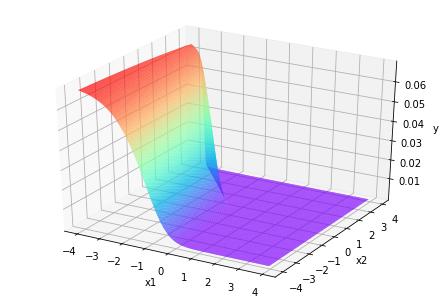

In [17]:
fig = figure()
ax = Axes3D(fig)
x1 = np.arange(-4, 4, 0.05)
x2 = np.arange(-4, 4, 0.05)
X, Y = np.meshgrid(x1, x2)
Z = np.zeros(X.shape)
width, height = X.shape
w11 = 25.51
w12 = 22.97
b1 = -3.98
w21 = 1.37
w22 = 0.18 
b2 = 0.25
w31 = -5.46
w32 = -9.56
b3 = -2.58
for i in range(height):
    for j in range(width):
        x1 = X[i,j]
        x2 = Y[i,j]
        h1 = sigmoid(w11*x1+w12*x2+b1)
        h2 = sigmoid(w21*x1+w22*x2+b2)
        Z[i,j] = sigmoid(w31*h1+w32*h2+b3)

ax.plot_surface(X, Y, Z, cmap='rainbow', rstride=1, cstride=1, alpha=0.9, lw=1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
#ax.set_zlim(0,40)
plt.show()

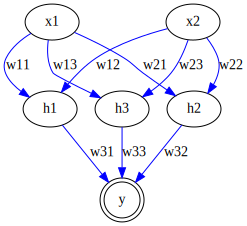

In [18]:
from graphviz import Digraph
u = Digraph()
u.edge("x1", "h1", label="w11", color="blue")
u.edge("x1", "h2", label="w21", color="blue")
u.edge("x1", "h3", label="w13", color="blue")
u.edge("x2", "h1", label="w12", color="blue")
u.edge("x2", "h2", label="w22", color="blue")
u.edge("x2", "h3", label="w23", color="blue")
u.edge("h1", "y", label="w31", color="blue")
u.edge("h2", "y", label="w32", color="blue")
u.edge("h3", "y", label="w33", color="blue")
u.node("y", shape="doublecircle")
u

In [22]:
def twolayerNN2(s, sampleNo):
    # 随机初始化各个参数
    w11 = np.random.rand()
    w12 = np.random.rand()
    w21 = np.random.rand()
    w22 = np.random.rand()
    w13 = np.random.rand()
    w23 = np.random.rand()
    w31 = np.random.rand()
    w32 = np.random.rand()
    w33 = np.random.rand()
    b1 = np.random.rand()
    b2 = np.random.rand()
    b3 = np.random.rand()
    b4 = np.random.rand()
    loss = 100000
    epoch = 0
    MaxEpoch = 1000
    lr = 0.1

    while True:
        if(epoch%20==0):
            print("epoch:", epoch)
            print("w11:%.2f, w12:%.2f, b1:%.2f"%(w11,w12,b1))
            print("w21:%.2f, w22:%.2f, b2:%.2f"%(w21,w22,b2))
            print("w13:%.2f, w23:%.2f, b3:%.2f"%(w13,w23,b3))
            print("w31:%.2f, w32:%.2f, w33:%.2f, b4:%.2f"%(w31,w32,w33,b4))
        lastloss = loss
        loss = 0
        partialw11 = 0
        partialw12 = 0
        partialb1 = 0
        partialw21 = 0
        partialw22 = 0
        partialb2 = 0
        partialw13 = 0
        partialw23 = 0
        partialb3 = 0
        partialw31 = 0
        partialw32 = 0
        partialw33 = 0
        partialb4 = 0
        for k in range(sampleNo):
            h1 = (w11*s[k,0]+w12*s[k,1]+b1)
            h2 = (w21*s[k,0]+w22*s[k,1]+b2)
            h3 = (w13*s[k,0]+w23*s[k,1]+b3)
            yhat = sigmoid(w31*h1+w32*h2+w33*h3+b4)
            #print("%.1f,\t%.1f,\t%.1f,\t%.1f,\t%.1f,\t%.1f"%(s[k,0], s[k,1], s[k,2], h1, h2, yhat))
            y = s[k,2]
            loss += (yhat-y)*(yhat-y)

            partialw31 += 2*(yhat-y)*yhat*(1-yhat)*h1
            partialw32 += 2*(yhat-y)*yhat*(1-yhat)*h2
            partialw33 += 2*(yhat-y)*yhat*(1-yhat)*h3
            partialb4 += 2*(yhat-y)*yhat*(1-yhat)

            partialh1 = 2*(yhat-y)*yhat*(1-yhat)*w31
            partialh2 = 2*(yhat-y)*yhat*(1-yhat)*w32
            partialh3 = 2*(yhat-y)*yhat*(1-yhat)*w33

            partialw11 += partialh1*h1*(1-h1)*s[k,0]
            partialw12 += partialh1*h1*(1-h1)*s[k,1]
            partialb1 += partialh1*h1*(1-h1)

            partialw21 += partialh2*h2*(1-h2)*s[k,0]
            partialw22 += partialh2*h2*(1-h2)*s[k,1]
            partialb2 += partialh2*h2*(1-h2)
            
            partialw13 += partialh3*h3*(1-h3)*s[k,0]
            partialw23 += partialh3*h3*(1-h3)*s[k,1]
            partialb3 += partialh3*h3*(1-h3)

        if(epoch%20==0):
            print("loss:%.2f"%loss)
        #if(lastloss<loss):
        #    break
        w11 = w11 - lr * partialw11
        w12 = w12 - lr * partialw12
        b1 = b1 - lr * partialb1
        w21 = w21 - lr * partialw21
        w22 = w22 - lr * partialw22
        b2 = b2 - lr * partialb2
        w13 = w13 - lr * partialw13
        w23 = w23 - lr * partialw23
        b3 = b3 - lr * partialb3
        w31 = w31 - lr * partialw31
        w32 = w32 - lr * partialw32
        w33 = w33 - lr * partialw33
        b4 = b4 - lr * partialb4
        epoch = epoch+1
        if(epoch>MaxEpoch):
            break
        if(loss<0.01):
            break
    print("epoch:", epoch)
    print("w11:%.2f, w12:%.2f, b1:%.2f"%(w11,w12,b1))
    print("w21:%.2f, w22:%.2f, b2:%.2f"%(w21,w22,b2))
    print("w13:%.2f, w23:%.2f, b3:%.2f"%(w13,w23,b3))
    print("w31:%.2f, w32:%.2f, w33:%.2f, b4:%.2f"%(w31,w32,w33,b4))
    print("loss:%.2f"%loss)

In [23]:
twolayerNN2(s, sampleNo)

epoch: 0
w11:0.05, w12:0.91, b1:0.73
w21:0.11, w22:0.78, b2:0.84
w13:0.24, w23:0.41, b3:0.96
w31:0.67, w32:0.78, w33:0.84, b4:0.33
loss:23.30
epoch: 20
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 40
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 60
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 80
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 100
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00


C:\Users\Alou\Anaconda\envs\tens\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


epoch: 120
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 140
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 160
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 180
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 200
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 220
w11:-120.18, w12:-131.37, b1:61.13
w21:-2.55, w22:2.37, b2:1.03
w13:-183.85, w23:-224.51, b3:103.69
w31:0.52, w32:-0.58, w33:-2.49, b4:-0.15
loss:23.00
epoch: 240
w11:-120.18

C:\Users\Alou\Anaconda\envs\tens\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


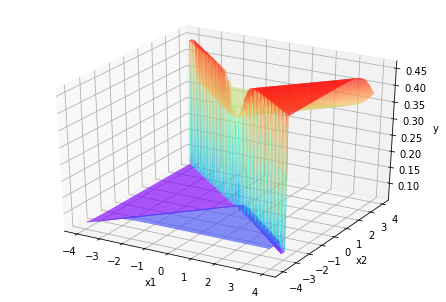

In [24]:
fig = figure()
ax = Axes3D(fig)
x1 = np.arange(-4, 4, 0.05)
x2 = np.arange(-4, 4, 0.05)
X, Y = np.meshgrid(x1, x2)
Z = np.zeros(X.shape)
width, height = X.shape

w11 = -120.18
w12 = -131.37
b1 = 61.13
w21 = -2.55
w22 = 2.37
b2 = 1.03
w13 = -183.85
w23 = -224.51
b3 = 103.69
w31 = 0.52
w32 = -0.58
w33 = -2.49
b4 = -0.15
for i in range(height):
    for j in range(width):
        x1 = X[i,j]
        x2 = Y[i,j]
        h1 = sigmoid(w11*x1+w12*x2+b1)
        h2 = sigmoid(w21*x1+w22*x2+b2)
        h3 = sigmoid(w13*x1+w23*x2+b3)
        Z[i,j] = sigmoid(w31*h1+w32*h2+w33*h3+b4)

ax.plot_surface(X, Y, Z, cmap='rainbow', rstride=1, cstride=1, alpha=0.9, lw=1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
#ax.set_zlim(0,40)
plt.show()

With the above experimntation we can conclude that the sigmoid function on the hidden layer the loss is not converging vers 0 event with more hidden layers the result is the same.